**IMPORTING** **NECSSARY** **LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV

**LOADING** **DATASET**

In [5]:
from google.colab import files
files.upload()

Saving df1_loan.csv to df1_loan.csv


{'df1_loan.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y,$5849.0\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N,$6091.0\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y,$3000.0\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y,$4941.0\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y,$6000.0\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y,$9613.0\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y,$3849.0\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N,$5540.0\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y,$5532.0\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N,$23809.0\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y,$3900.0\r\nLP001027,Male,Yes,2

In [6]:
df = pd.read_csv('df1_loan.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            500 non-null    object 
 1   Gender             491 non-null    object 
 2   Married            497 non-null    object 
 3   Dependents         488 non-null    object 
 4   Education          500 non-null    object 
 5   Self_Employed      473 non-null    object 
 6   ApplicantIncome    500 non-null    int64  
 7   CoapplicantIncome  500 non-null    float64
 8   LoanAmount         482 non-null    float64
 9   Loan_Amount_Term   486 non-null    float64
 10  Credit_History     459 non-null    float64
 11  Property_Area      500 non-null    object 
 12  Loan_Status        500 non-null    object 
 13  Total_Income       500 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 54.8+ KB


In [8]:
df.shape

(500, 14)

**DATA** **PREPROCESSING**

In [9]:
df.isnull().sum().sum()

124

In [10]:
df.dropna(inplace=True)

In [11]:
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']:
  df[col] = df[col].replace({'\$': '', ',': ''}, regex = True).astype(float)


In [12]:
mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
df['Dependents'] = df['Dependents'].replace(mapping)
df['Dependents'] = df['Dependents'].astype(int)

In [13]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in column {column}:")
    print(df[column].unique())


Unique values in column Loan_ID:
['LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011' 'LP001013'
 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001028' 'LP001029'
 'LP001030' 'LP001032' 'LP001036' 'LP001038' 'LP001043' 'LP001046'
 'LP001047' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001095'
 'LP001097' 'LP001098' 'LP001100' 'LP001112' 'LP001114' 'LP001116'
 'LP001119' 'LP001120' 'LP001131' 'LP001138' 'LP001144' 'LP001146'
 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179' 'LP001186'
 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199' 'LP001205'
 'LP001206' 'LP001207' 'LP001222' 'LP001225' 'LP001228' 'LP001233'
 'LP001238' 'LP001241' 'LP001243' 'LP001245' 'LP001248' 'LP001253'
 'LP001255' 'LP001256' 'LP001259' 'LP001263' 'LP001265' 'LP001267'
 'LP001275' 'LP001279' 'LP001282' 'LP001289' 'LP001310' 'LP001316'
 'LP001318' 'LP001319' 'LP001322' 'LP001325' 'LP001327' 'LP001333'
 'LP001334' 'LP001343' 'LP001345' 'LP001349' 'LP001367' 'LP001369'
 'LP001379' 'LP001384' 'LP001

In [14]:
binary_column = ['Gender','Married','Education','Self_Employed','Loan_Status','Property_Area']
LE = LabelEncoder()
for col in binary_column:
  df[col] = LE.fit_transform(df[col])


In [15]:
df.drop(['Loan_ID'], axis=1, inplace=True)


In [16]:
scaler = StandardScaler()
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [17]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,1,1,0,0,-0.139156,-0.012913,-0.188440,0.272411,1.0,0,0,-0.139415
2,1,1,0,0,1,-0.402201,-0.678394,-1.006040,0.272411,1.0,2,1,-0.636626
3,1,1,0,1,0,-0.471493,0.362192,-0.293937,0.272411,1.0,2,1,-0.324402
4,1,0,0,0,0,0.096305,-0.678394,-0.017008,0.272411,1.0,2,1,-0.154053
5,1,1,2,0,1,-0.000571,1.173302,1.644566,0.272411,1.0,2,1,0.427125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,1,0,0,0,-0.302998,0.273491,-0.307124,0.272411,0.0,0,0,-0.193624
495,0,1,1,0,0,-0.348030,-0.275487,-0.491743,-4.130341,1.0,1,1,-0.437324
496,1,1,0,1,0,-0.468668,0.071817,-0.465369,0.272411,1.0,0,1,-0.427511
498,1,1,1,0,1,-0.419648,-0.678394,-0.623614,0.272411,1.0,1,1,-0.653516


**EXPLORATORY** **DATA** **ANALYSIS**

**HeatMap**

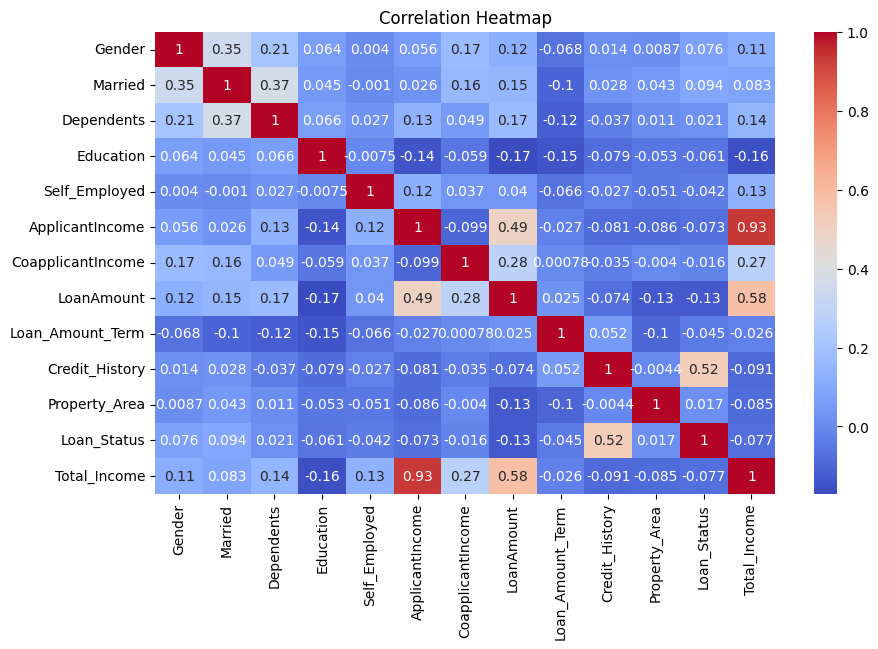

In [18]:

correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**HistPlot** **by** **Loan** **Status**



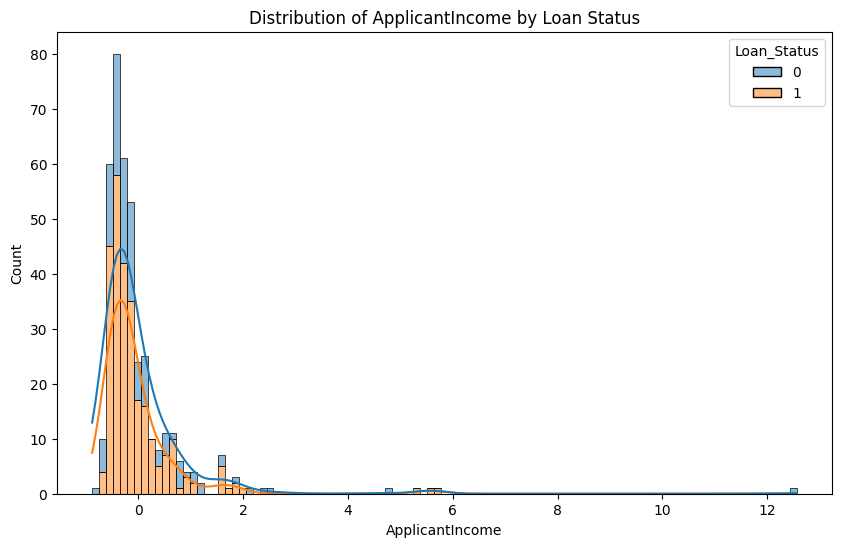

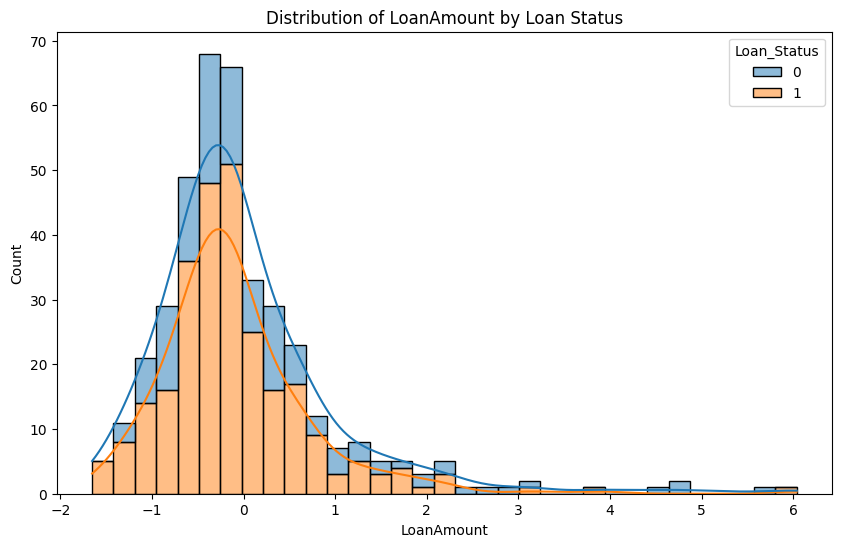

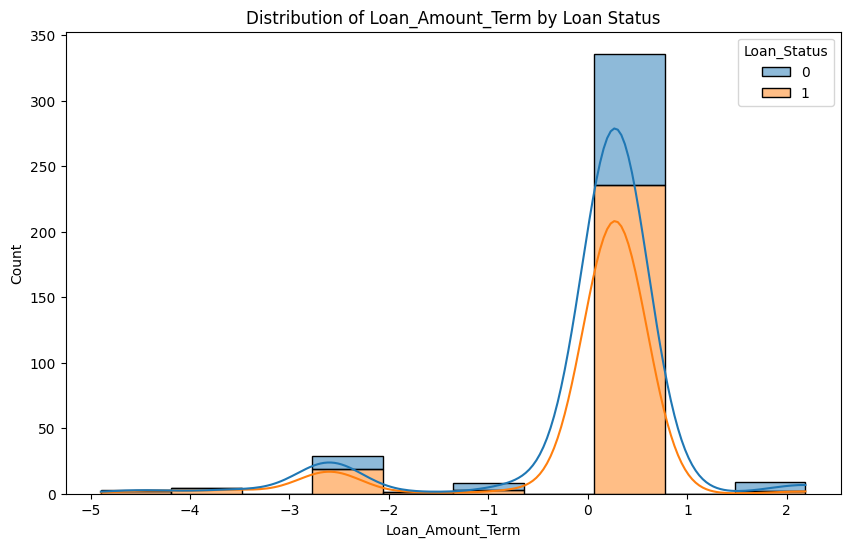

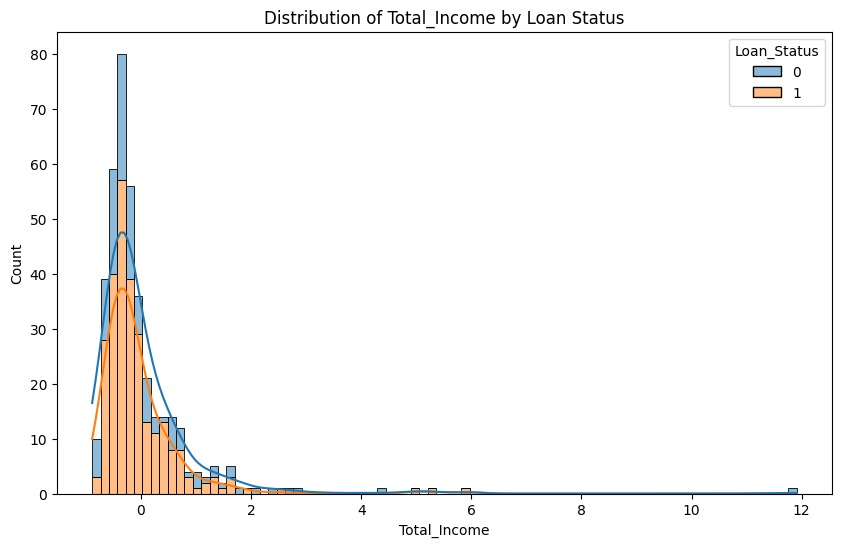

In [19]:
features = ['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='Loan_Status', multiple='stack', kde=True)
    plt.title(f'Distribution of {feature} by Loan Status')
    plt.show()


**SPLITTING** **THE** **DATASET**

In [20]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**MODEL** **SELECTION**

*   LOGISTIC REGRESSION
*   RANDOM FOREST
*   DECISION TREE






In [21]:

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("ROC-AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))
print("ROC-AUC Score:", roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1]))


Logistic Regression Accuracy: 0.7948717948717948
              precision    recall  f1-score   support

           0       0.93      0.46      0.62        28
           1       0.77      0.98      0.86        50

    accuracy                           0.79        78
   macro avg       0.85      0.72      0.74        78
weighted avg       0.82      0.79      0.77        78

ROC-AUC Score: 0.7828571428571428
Decision Tree Accuracy: 0.7307692307692307
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        28
           1       0.75      0.86      0.80        50

    accuracy                           0.73        78
   macro avg       0.71      0.68      0.69        78
weighted avg       0.72      0.73      0.72        78

Random Forest Accuracy: 0.7564102564102564
              precision    recall  f1-score   support

           0       0.76      0.46      0.58        28
           1       0.75      0.92      0.83        50

    accuracy 

**Oversampling** **the** **Minority** **Class**

In [24]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Original dataset shape:", Counter(y_train))
print("Resampled dataset shape:", Counter(y_resampled))


Original dataset shape: Counter({1: 217, 0: 95})
Resampled dataset shape: Counter({1: 217, 0: 217})


**Undersampling** **the** **Majority** **Class**


In [25]:
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

print("Original dataset shape:", Counter(y_train))
print("Resampled dataset shape:", Counter(y_resampled))


Original dataset shape: Counter({1: 217, 0: 95})
Resampled dataset shape: Counter({0: 95, 1: 95})


**Combining** **Oversampling** **and** **Undersampling**

In [26]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print("Original dataset shape:", Counter(y_train))
print("Resampled dataset shape:", Counter(y_resampled))


Original dataset shape: Counter({1: 217, 0: 95})
Resampled dataset shape: Counter({0: 135, 1: 106})


**ERROR** **ANALYSIS**

In [34]:
error_cases_indices = [i for i, (actual, predicted) in enumerate(zip(y_test, y_pred)) if actual != predicted]

error_cases_features = X_test.iloc[error_cases_indices].copy()
error_cases_features['Actual'] = y_test.iloc[error_cases_indices].values
error_cases_features['Predicted'] = y_pred[error_cases_indices]

print("Error Cases with Features:")
print(error_cases_features.head())


Error Cases with Features:
     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
401       1        0           0          1              0        -0.442912   
342       1        1           1          1              0        -0.143975   
257       1        1           3          0              0        -0.028322   
18        1        1           0          1              0        -0.088641   
161       1        1           0          0              0         0.417509   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
401          -0.678394   -1.019227         -0.684709             1.0   
342          -0.136036    0.207173          0.272411             1.0   
257          -0.678394   -0.636801          0.272411             1.0   
18           -0.678394   -0.122505          0.272411             1.0   
161          -0.678394    1.750062          0.272411             1.0   

     Property_Area  Total_Income  Actual  Predicted  
401        

In [30]:
for column in error_cases_features.columns:
    if column not in ['Actual', 'Predicted']:
        print(f"Feature: {column}")
        print(error_cases_features[column].describe())
        print()

Feature: Gender
count    18.000000
mean      0.944444
std       0.235702
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Gender, dtype: float64

Feature: Married
count    18.000000
mean      0.722222
std       0.460889
min       0.000000
25%       0.250000
50%       1.000000
75%       1.000000
max       1.000000
Name: Married, dtype: float64

Feature: Dependents
count    18.000000
mean      1.277778
std       1.178511
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: Dependents, dtype: float64

Feature: Education
count    18.000000
mean      0.222222
std       0.427793
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Education, dtype: float64

Feature: Self_Employed
count    18.000000
mean      0.166667
std       0.383482
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Self_Employ

Error Cases with Features:
     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
401       1        0           0          1              0        -0.442912   
342       1        1           1          1              0        -0.143975   
257       1        1           3          0              0        -0.028322   
18        1        1           0          1              0        -0.088641   
161       1        1           0          0              0         0.417509   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
401          -0.678394   -1.019227         -0.684709             1.0   
342          -0.136036    0.207173          0.272411             1.0   
257          -0.678394   -0.636801          0.272411             1.0   
18           -0.678394   -0.122505          0.272411             1.0   
161          -0.678394    1.750062          0.272411             1.0   

     Property_Area  Total_Income  Actual  Predicted  
401        

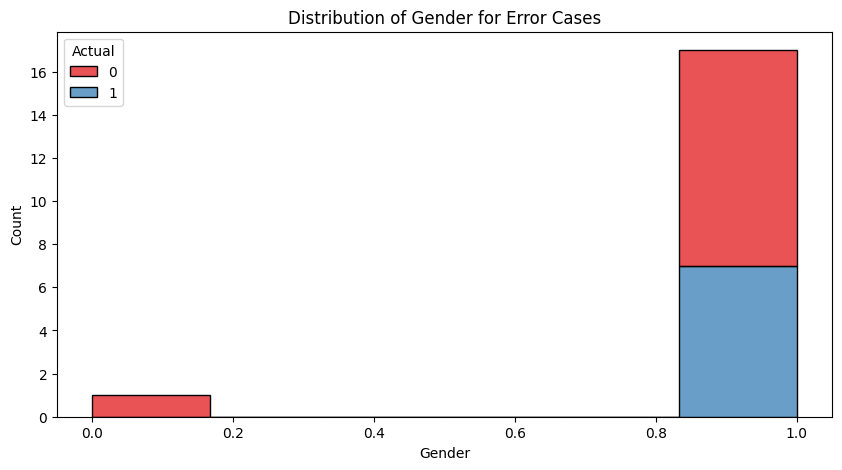

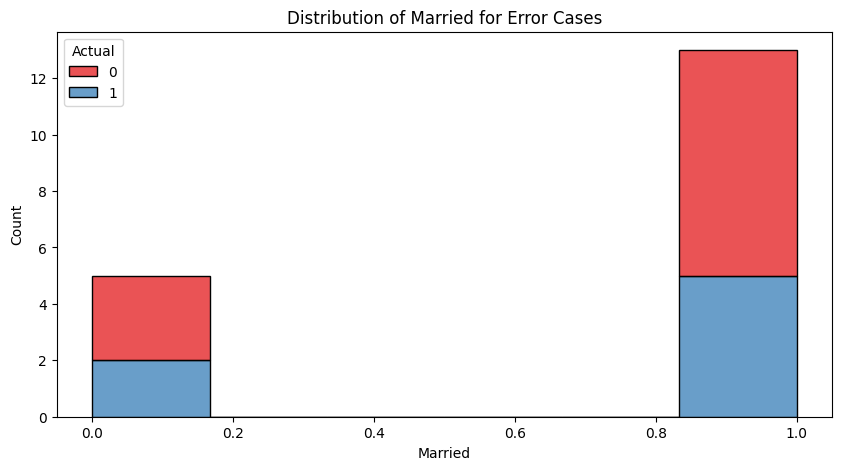

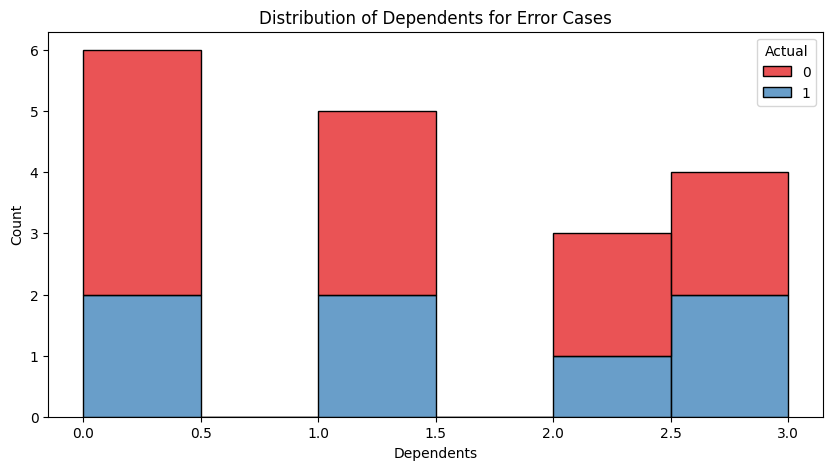

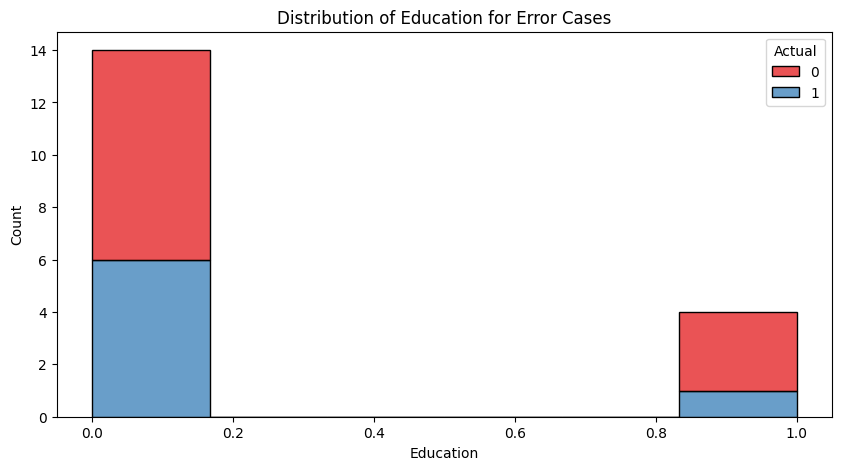

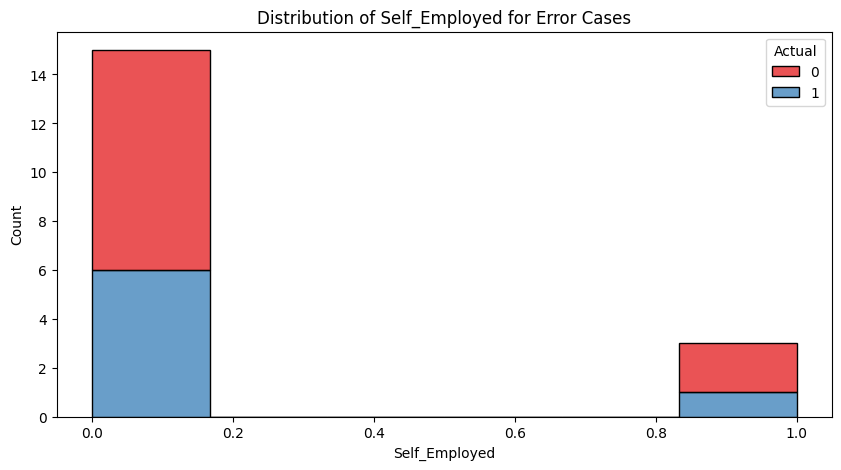

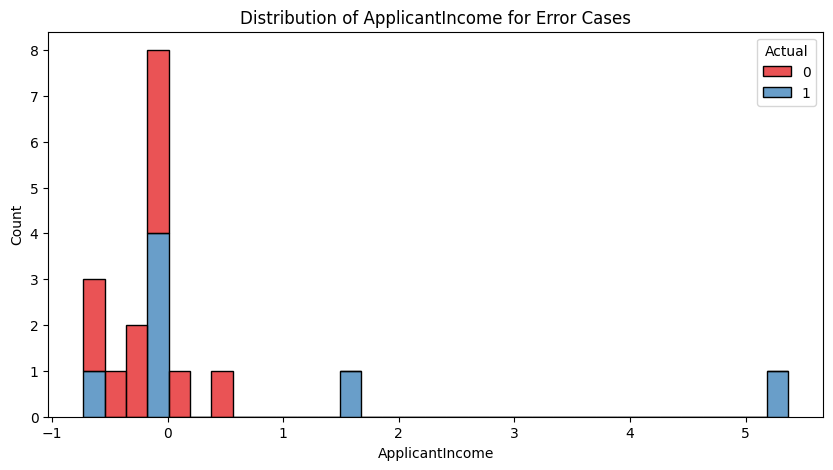

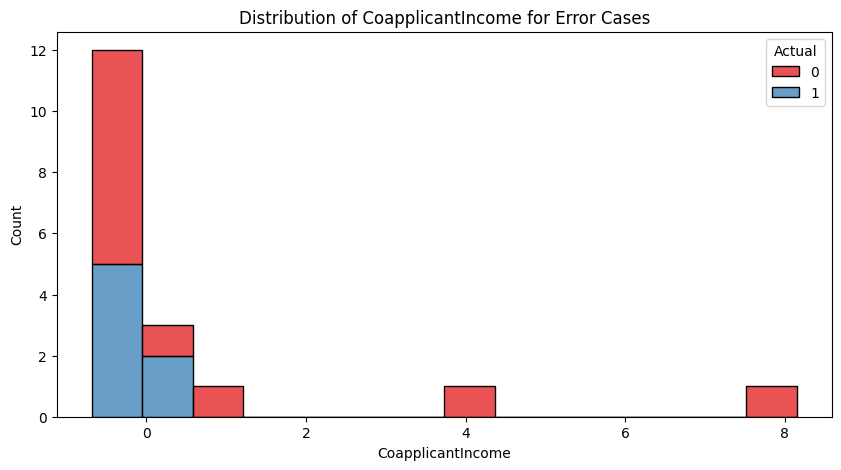

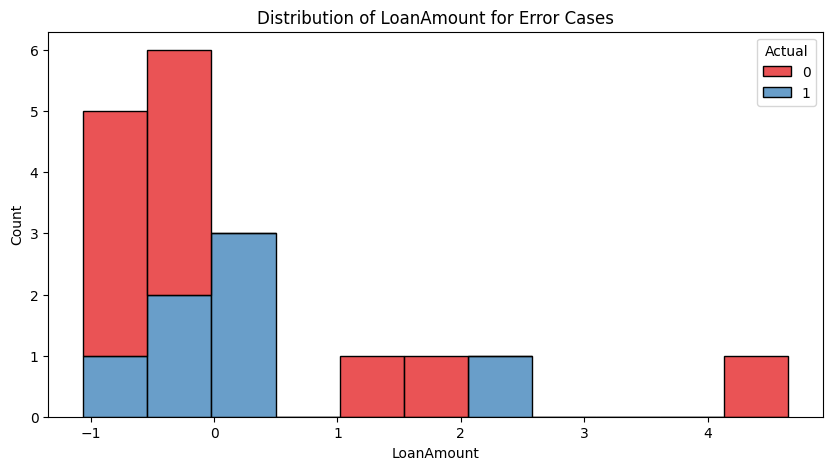

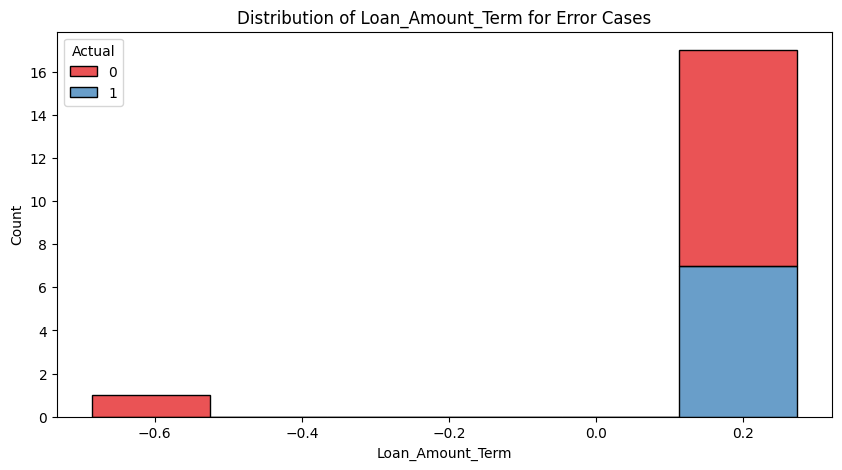

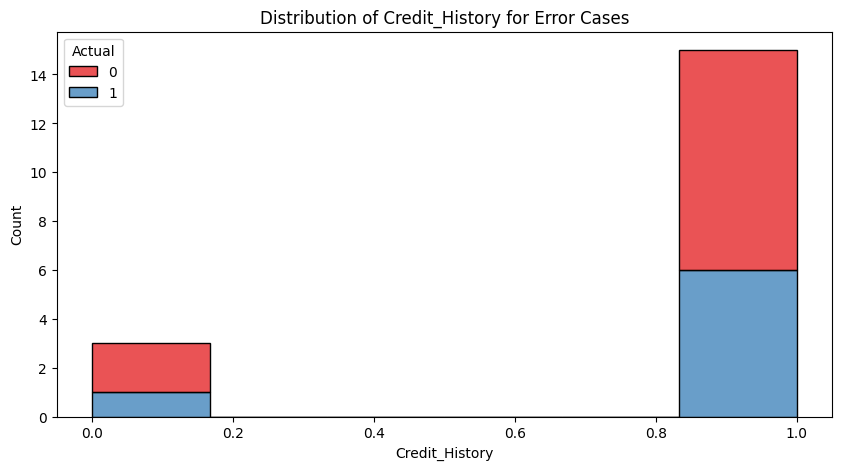

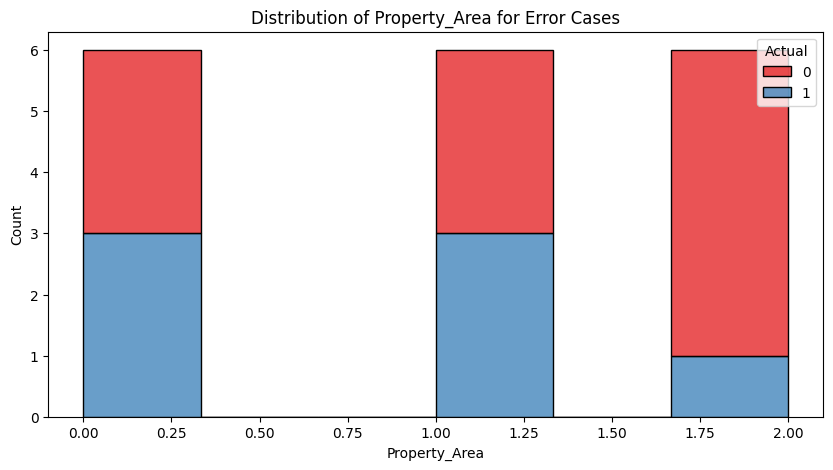

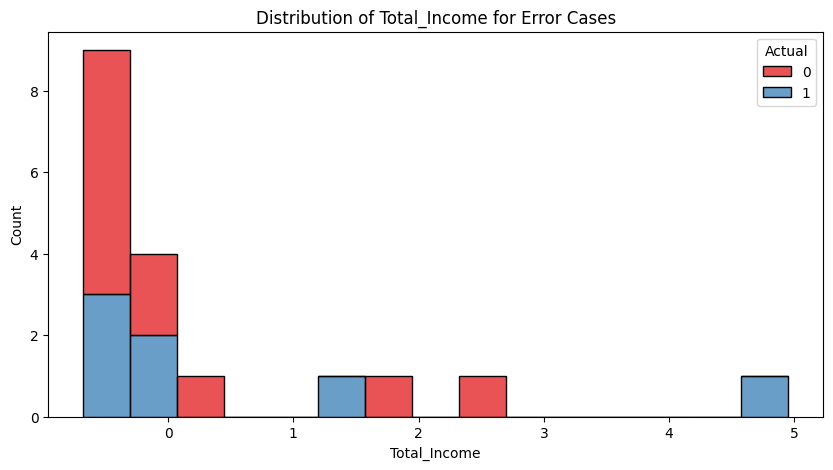

In [31]:
error_cases_indices = [i for i, (actual, predicted) in enumerate(zip(y_test, y_pred)) if actual != predicted]

error_cases_features = X_test.iloc[error_cases_indices].copy()
error_cases_features['Actual'] = y_test.iloc[error_cases_indices].values
error_cases_features['Predicted'] = y_pred[error_cases_indices]

print("Error Cases with Features:")
print(error_cases_features.head())

features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
             'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
             'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income']

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=error_cases_features, x=feature, hue='Actual', multiple='stack', palette='Set1')
    plt.title(f'Distribution of {feature} for Error Cases')
    plt.show()


**TUNING**

**Random Forest**

In [27]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

y_pred = grid_search.best_estimator_.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1]))


Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.763046622899744
Random Forest Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.78      0.50      0.61        28
           1       0.77      0.92      0.84        50

    accuracy                           0.77        78
   macro avg       0.77      0.71      0.72        78
weighted avg       0.77      0.77      0.75        78

ROC-AUC Score: 0.8314285714285714


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1]))



Random Forest Accuracy: 0.782051282051282
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        28
           1       0.80      0.88      0.84        50

    accuracy                           0.78        78
   macro avg       0.77      0.74      0.75        78
weighted avg       0.78      0.78      0.78        78

ROC-AUC Score: 0.8314285714285715


**Desicion Tree Classifier**

In [32]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

y_pred = grid_search.best_estimator_.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1]))


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Score: 0.7146294647824636
Decision Tree Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.80      0.86      0.83        50

    accuracy                           0.77        78
   macro avg       0.75      0.73      0.74        78
weighted avg       0.76      0.77      0.76        78

ROC-AUC Score: 0.7732142857142856
